In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import datetime
import math
%matplotlib inline

In [2]:
# with open('./data/btceUSD.csv')
data = pd.read_csv('./data/btceUSD.csv',names=['time','price','amount'])
data.head()

,time,price,amount
0,1313331280,10.4,0.779
1,1313334917,10.4,0.101
2,1313334917,10.4,0.316
3,1313340309,10.5,1.800
4,1313340309,10.5,0.150


In [5]:
data.tail()

,time,price,amount
29840197,1493298623,1287.993,0.060000
29840198,1493298623,1287.994,0.501309
29840199,1493298627,1287.994,0.496647
29840200,1493298633,1286.594,0.170893
29840201,1493298634,1286.594,0.179107


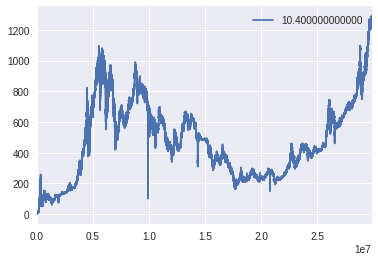

In [7]:
data[[1]].plot()

In [8]:
data.shape
#29840201 instantes de tiempo con 2 tipos de info: valor(grafica arriba) y otra cosa

(29840201, 3)

In [14]:
import json

with open('data/btc.json') as json_data:
    data_json = json.load(json_data)
data_json = data_json['dataset']
day_data = data_json['data']
col_names = data_json['column_names']

In [16]:
data_daily = pd.DataFrame(day_data, columns=col_names)
print(data_daily.shape)
data_daily.head()
#info de 1435 dias, contando muchos null antes de febrero de 2014

(1435, 9)


,Date,High,Low,Average,Last,Buy,Sell,Volume,Volume (Currency)
0,2017-04-28,1309.800,1272.001,1290.9005,1286.990,1286.990,1283.212,7.185310e+06,5556.85617
1,2017-04-27,1315.112,1269.961,1292.5365,1307.560,1307.560,1305.703,9.831839e+06,7618.30873
2,2017-04-26,1278.000,1241.234,1259.6170,1270.092,1272.999,1270.094,7.534506e+06,5964.86005
3,2017-04-25,1264.197,1239.116,1251.6565,1245.432,1249.474,1242.302,6.453938e+06,5151.37187
4,2017-04-24,1248.000,1225.000,1236.5000,1242.600,1242.600,1241.871,5.677019e+06,4581.44823


In [17]:
data_daily.tail()

,Date,High,Low,Average,Last,Buy,Sell,Volume,Volume (Currency)
1430,2013-05-03,108.00,79.740,NaN,NaN,NaN,NaN,28192.560,NaN
1431,2013-05-02,125.93,95.130,NaN,NaN,NaN,NaN,24845.180,NaN
1432,2013-05-01,133.86,98.011,NaN,NaN,NaN,NaN,16227.540,NaN
1433,2013-04-30,135.98,129.010,NaN,NaN,NaN,NaN,8699.522,NaN
1434,2013-04-29,135.20,130.100,NaN,NaN,NaN,NaN,4372.696,NaN


In [ ]:
#cleaning daily data
data_daily.drop(['Last','Buy','Sell'])

In [23]:
data[[0]].iloc[0][0]

1484236863

In [62]:
def to_date_string(timestamp):
    return datetime.datetime.fromtimestamp(
        int(timestamp)
    ).strftime('%Y-%m-%d %H:%M:%S')

def to_date(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp))

def time_diff(t1,t2):
    a, b = to_date(t1), to_date(t2)
    return (b-a).total_seconds()

In [13]:
a = data[[0]].iloc[0][0]
b = data[[0]].iloc[29840200][0]
print(to_date_string(a))
print(to_date_string(b))
t = time_diff(a,b)
print(t,'seconds')
print(t/60,'minutes')
print((t/60)/60/24,'days')
print((t/60)/60/24/7,'weeks')
print((t/60)/60/24/365,'years')

2011-08-14 09:14:40
2017-04-27 08:10:33
179967353.0 seconds
2999455.8833333333 minutes
2082.955474537037 days
297.5650677910053 weeks
5.706727327498731 years


In [49]:
last_t = data[[0]].iloc[0][0]
d60 = []
data_hour = pd.DataFrame()
i = 0
for index, row in data.iterrows():
    x = time_diff(last_t, row['time']) / 60
#     print(to_date_string(row['time']))
#     print(x, row['amount'])
    if x > 60:
        i += 1
        last_t = row['time']
        print(d60)
#         data_hour.append(pd.DataFrame(d60).mean())
        d60 = []
#         print()
    if i == 10:
        break
    d60.append(type(row))


[<class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>]
[<class 'pandas.core.series.Series'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.series.Ser

In [44]:
# to_date_string(last_t)
data_hour.head()

""


In [3]:
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(5)

Using TensorFlow backend.


In [4]:
dataset = data.values
dataset = dataset.astype('float32')

In [54]:
dataset

array([[  1.31333133e+09,   1.03999996e+01,   7.78999984e-01],
       [  1.31333491e+09,   1.03999996e+01,   1.01000004e-01],
       [  1.31333491e+09,   1.03999996e+01,   3.16000015e-01],
       ..., 
       [  1.49329869e+09,   1.28799402e+03,   4.96646643e-01],
       [  1.49329869e+09,   1.28659399e+03,   1.70892924e-01],
       [  1.49329869e+09,   1.28659399e+03,   1.79107070e-01]], dtype=float32)

In [11]:
train_size = int(len(dataset) * 0.05)
test_size = len(dataset)
# test_size = len(dataset) - train_size
test_size = int(1.2 * train_size)
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train, test = dataset[0:train_size,:], dataset[train_size:test_size,:]
print(len(train), len(test))

1492010 298402


In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        past_back, volume = [x[1] for x in a ], sum([x[2] for x in a])
#         a = dataset[i:(i+look_back), 1:3][0]
        past_back.append(volume)
        dataX.append(past_back)
        dataY.append(dataset[i + look_back, 1])
    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [94]:
trainX

array([[ 10.39999962,  10.39999962,  10.39999962,  10.5       ,
         10.5       ,   3.14599996],
       [ 10.39999962,  10.39999962,  10.5       ,  10.5       ,
         10.5       ,   4.47699987],
       [ 10.39999962,  10.5       ,  10.5       ,  10.5       ,
         10.5       ,   9.26599973],
       [ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
         10.5       ,   9.37999973],
       [ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
         10.5       ,   8.61999974],
       [ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
         10.5       ,  11.25837964],
       [ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
         10.5       ,   9.64837974],
       [ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
         11.        ,   5.98317987],
       [ 10.5       ,  10.5       ,  10.5       ,  11.        ,
         10.89999962,   6.13900685],
       [ 10.5       ,  10.5       ,  11.        ,  10.89999962,
         11.        ,   5.5

In [95]:
trainY

array([ 10.5       ,  10.5       ,  10.5       ,  10.5       ,
        10.5       ,  10.5       ,  11.        ,  10.89999962,
        11.        ,  10.        ,  11.        ,  10.        ,
        10.        ,  10.        ,  10.        ,  10.        ,
        11.        ,  11.        ,  10.39999962,  11.        ,
        11.        ,  11.25      ,  11.25      ,  11.27000046,
        11.30000019,  10.75      ,  11.19999981,  11.39999962,
        11.44999981,  11.47000027,  11.47999954,  11.5       ,
        11.89999962,  11.89999962,  11.19999981,  10.84000015,
        10.81999969,  10.81999969,  11.39999962,  11.47000027,
        11.47000027,  10.81999969,  11.35000038,  11.39999962,
        11.        ,  11.        ,  11.        ,  11.        ,
        11.        ,  10.97999954,  10.82999992,  11.10000038,
        11.10000038,  10.82999992,  10.85000038,  10.85000038,
        10.82999992,  10.81999969,  10.81999969,  10.75      ,
        10.69999981,  10.69999981,  10.69999981,  10.89

In [14]:
trainX.shape

(1492006, 4)

In [15]:
model = Sequential()
model.add(Dense(12, input_dim=look_back+1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2, batch_size=5, verbose=2)

Epoch 1/2
277s - loss: 0.3975
Epoch 2/2
289s - loss: 0.1757


In [16]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MeanSquareError (%.2f RootMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.18 MeanSquareError (0.42 RootMSE)
Test Score: 0.07 MSE (0.27 RMSE)


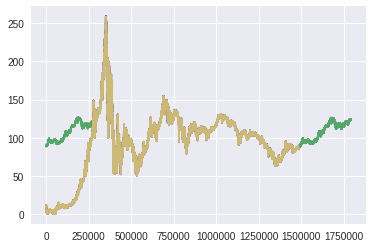

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:test_size-1, :] = testPredict

# plot baseline and predictions
plt.plot(trainY)
plt.plot(testY)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [118]:
trainY.shape

(83,)

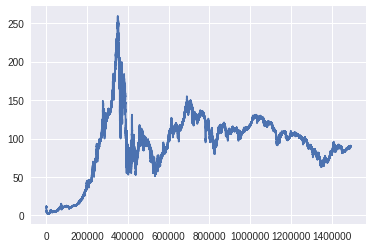

In [20]:
# Lo que es
plt.plot(trainY)
plt.show()

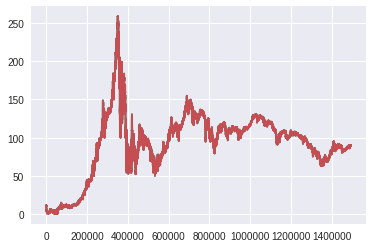

In [21]:
# Lo que el modelo predice `look_back` transacciones antes?
plt.plot(trainPredictPlot)
plt.show()

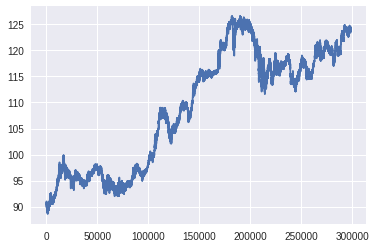

In [22]:
plt.plot(testY)
plt.show()

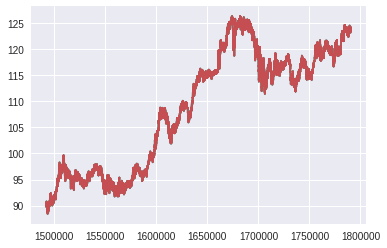

In [23]:
plt.plot(testPredictPlot)
plt.show()

In [24]:
data.tail()

,time,price,amount
29840197,1493298623,1287.993,0.060000
29840198,1493298623,1287.994,0.501309
29840199,1493298627,1287.994,0.496647
29840200,1493298633,1286.594,0.170893
29840201,1493298634,1286.594,0.179107


In [46]:
train_size = int(len(dataset) * 0.0001)
test_size = len(dataset)
# test_size = len(dataset) - train_size
test_size = int(1.2 * train_size)
cross_size = 1000
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train, test = dataset[0:train_size,:], dataset[train_size:test_size,:]
cross = dataset[-cross_size:]
print(len(train), len(test))

2984 596


In [48]:
cross[-1]

array([  1.49329869e+09,   1.28659399e+03,   1.79107070e-01], dtype=float32)

In [37]:
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(12, input_dim=look_back+1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2, batch_size=2, verbose=2)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MeanSquareError (%.2f RootMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Epoch 1/2
1s - loss: 0.9167
Epoch 2/2
1s - loss: 0.1764
Train Score: 0.07 MeanSquareError (0.26 RootMSE)
Test Score: 0.08 MSE (0.27 RMSE)


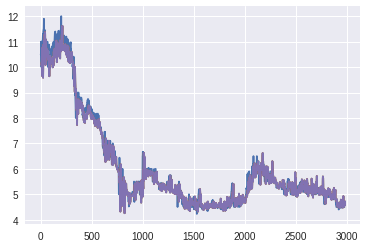

In [38]:
trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:test_size-1, :] = testPredict

# plot baseline and predictions
plt.plot(trainY)
# plt.plot(testY)
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

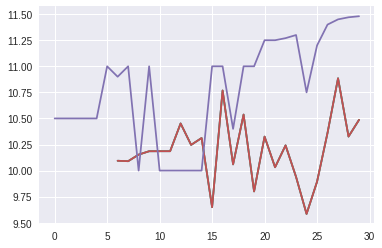

In [44]:
plt.plot(trainPredictPlot[:30])
plt.plot(trainY[:30])
plt.show()

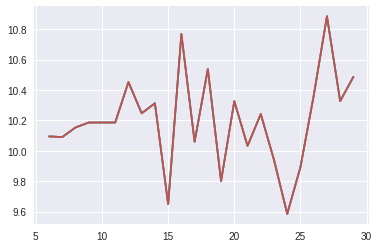

In [45]:
plt.plot(trainPredictPlot[:30])
plt.show()

In [49]:
look_back = 6
# trainX, trainY = create_dataset(train, look_back)
crossX, crossY = create_dataset(cross, look_back)

# model = Sequential()
# model.add(Dense(12, input_dim=look_back+1, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=2, batch_size=2, verbose=2)

# trainScore = model.evaluate(trainX, trainY, verbose=0)
# print('Train Score: %.2f MeanSquareError (%.2f RootMSE)' % (trainScore, math.sqrt(trainScore)))
crossScore = model.evaluate(crossX, crossY, verbose=0)
print('cross Score: %.2f MSE (%.2f RMSE)' % (crossScore, math.sqrt(crossScore)))

cross Score: 4586.97 MSE (67.73 RMSE)


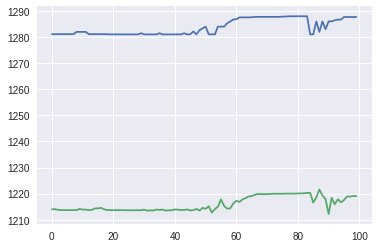

In [61]:
crossPredict = model.predict(crossX)
# testPredict = model.predict(testX)

# shift train predictions for plotting
# crossPredictPlot = np.empty_like(dataset)
# crossPredictPlot[:, :] = np.nan
# crossPredict.shape 993
# crossPredictPlot[-cross_size+look_back+1:, :] = crossPredict

# shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:test_size-1, :] = testPredict

# plot baseline and predictions
plt.plot(crossY[:100])
# plt.plot(testY)
plt.plot(crossPredict[:100])
# plt.plot(testPredictPlot)
plt.show()

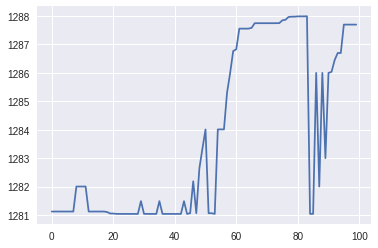

In [62]:
plt.plot(crossY[:100])
plt.show()

In [64]:
data.tail(50)

,time,price,amount
29840152,1493298602,1285.002,0.011124
29840153,1493298602,1285.000,0.796228
29840154,1493298603,1287.993,0.011000
29840155,1493298604,1287.993,0.052161
29840156,1493298608,1287.993,0.989911
29840157,1493298608,1287.993,0.003969
29840158,1493298608,1287.994,0.259383
29840159,1493298608,1287.994,0.101590
29840160,1493298608,1287.994,0.015439
29840161,1493298608,1287.994,0.310345


In [69]:
past = [ 1287.994, 1285.500, 1286.500, 1287.838, 1287.994, 1287.050]
volume = sum([ 0.011650, 0.010000, 0.010000, 0.080000, 1.250000, 0.010000])
past.append(volume)
x = np.array(past)
y = model.predict(x.reshape(1,7), batch_size=1)
print(y, '1287.202')

[[ 1218.40759277]] 1287.202
